In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('spend_analysis_dataset.csv')

In [6]:
df.head()

,TransactionID,ItemName,Category,Quantity,UnitPrice,TotalCost,PurchaseDate,Supplier,Buyer
0,TXN001,Desk Chair,Furniture,10,113.15,1131.50,2024-04-19,TechMart Inc.,Kelly Joseph
1,TXN002,Stapler,Office Supplies,16,12.62,201.92,2024-07-06,CloudSoft Corp.,Kelly Joseph
2,TXN003,Annual Software License,Software,1,5649.34,5649.34,2024-09-10,TechMart Inc.,Kelly Joseph
3,TXN004,Notepad,Stationery,13,2.92,37.96,2024-01-21,FurniWorks Ltd.,Luis Holland
4,TXN005,Notepad,Stationery,19,1.39,26.41,2024-02-03,TechMart Inc.,Cynthia Jenkins


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TransactionID  500 non-null    object 
 1   ItemName       500 non-null    object 
 2   Category       500 non-null    object 
 3   Quantity       500 non-null    int64  
 4   UnitPrice      500 non-null    float64
 5   TotalCost      500 non-null    float64
 6   PurchaseDate   500 non-null    object 
 7   Supplier       500 non-null    object 
 8   Buyer          500 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 35.3+ KB


In [8]:
df.isnull().sum()

TransactionID    0
ItemName         0
Category         0
Quantity         0
UnitPrice        0
TotalCost        0
PurchaseDate     0
Supplier         0
Buyer            0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [12]:
df.describe()

,Quantity,UnitPrice,TotalCost
count,500.000000,500.000000,500.00000
mean,9.640000,854.245100,2481.16106
std,6.168834,2132.890832,3527.35316
min,1.000000,1.060000,1.56000
25%,4.000000,14.380000,145.92750
50%,10.000000,143.595000,918.56000
75%,15.000000,287.925000,3123.56750
max,20.000000,9909.240000,18494.60000


In [13]:
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  500 non-null    object        
 1   ItemName       500 non-null    object        
 2   Category       500 non-null    object        
 3   Quantity       500 non-null    int64         
 4   UnitPrice      500 non-null    float64       
 5   TotalCost      500 non-null    float64       
 6   PurchaseDate   500 non-null    datetime64[ns]
 7   Supplier       500 non-null    object        
 8   Buyer          500 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 35.3+ KB


# Exploratory Data Analysis On Purchase

### Monthly Purchase Volume by Category (Multi-Line Plot)¶

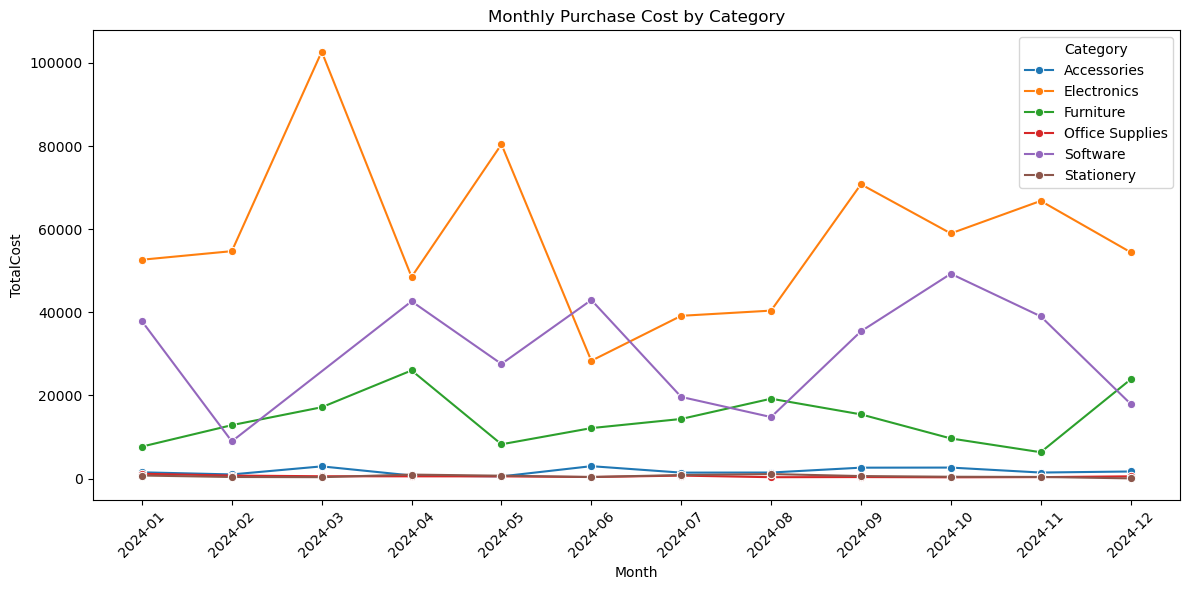

In [15]:
df['Month'] = df['PurchaseDate'].dt.to_period('M').astype(str)

monthly_cat = df.groupby(['Month', 'Category'])['TotalCost'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_cat, x='Month', y='TotalCost', hue='Category', marker='o')
plt.title('Monthly Purchase Cost by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Day of Week vs. Hour of Purchase

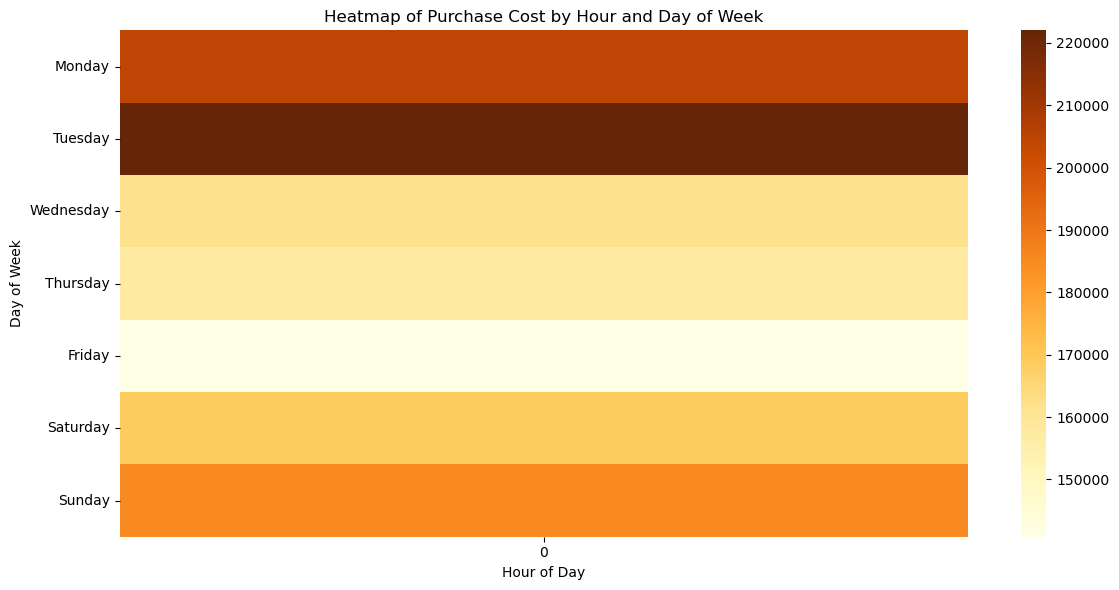

In [16]:
df['Hour'] = df['PurchaseDate'].dt.hour
df['Weekday'] = df['PurchaseDate'].dt.day_name()

pivot = df.pivot_table(index='Weekday', columns='Hour', values='TotalCost', aggfunc='sum').fillna(0)
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot = pivot.reindex(ordered_days)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='YlOrBr')
plt.title('Heatmap of Purchase Cost by Hour and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

### Unit Price vs. Quantity with Cost Hue

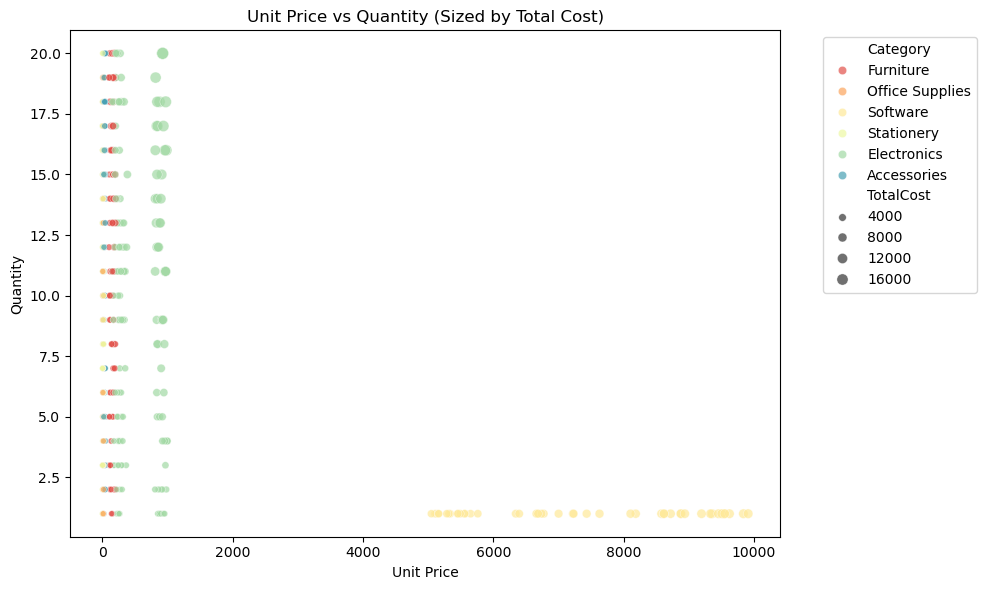

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='UnitPrice', y='Quantity', size='TotalCost', hue='Category', palette='Spectral', alpha=0.7)
plt.title('Unit Price vs Quantity (Sized by Total Cost)')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()

### Top Purchased Items by Quantity

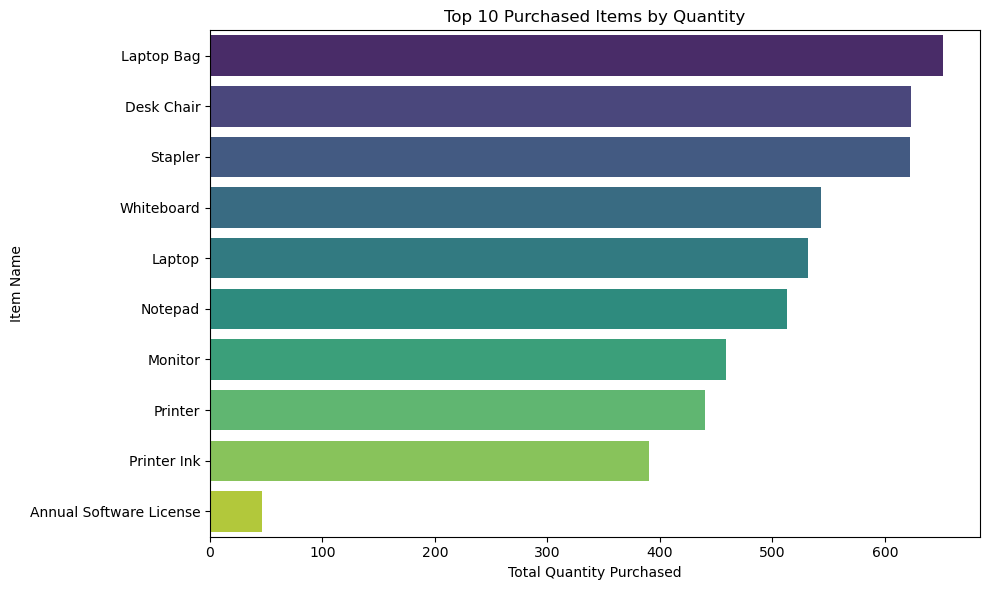

In [18]:
top_items = df.groupby('ItemName')['Quantity'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_items, x='Quantity', y='ItemName', palette='viridis')
plt.title('Top 10 Purchased Items by Quantity')
plt.xlabel('Total Quantity Purchased')
plt.ylabel('Item Name')
plt.tight_layout()
plt.show()

#### Category-wise Total Purchase Cost

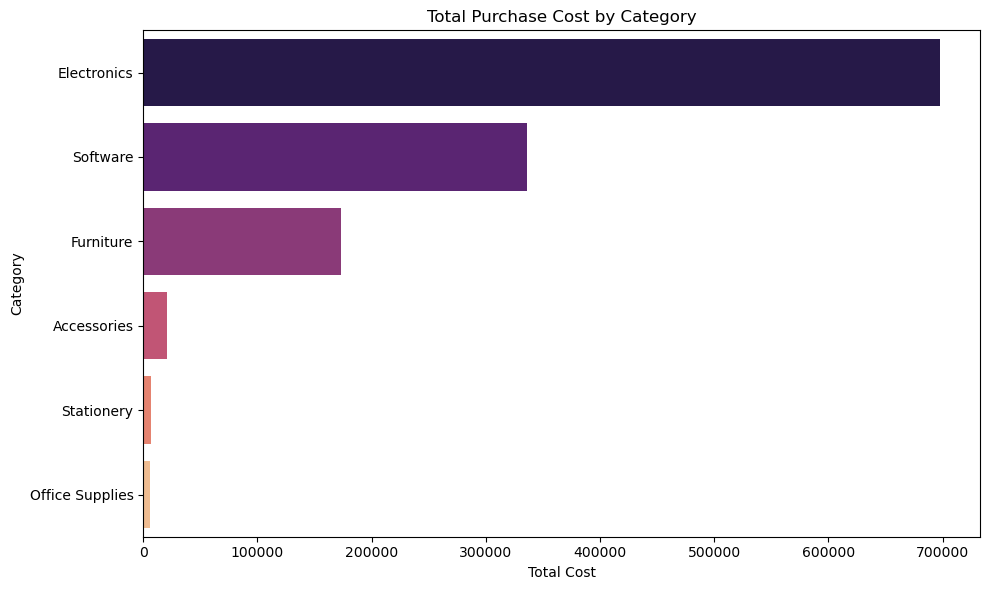

In [19]:
category_cost = df.groupby('Category')['TotalCost'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=category_cost, x='TotalCost', y='Category', palette='magma')
plt.title('Total Purchase Cost by Category')
plt.xlabel('Total Cost')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

### Time Series Plot: Purchases Over Time

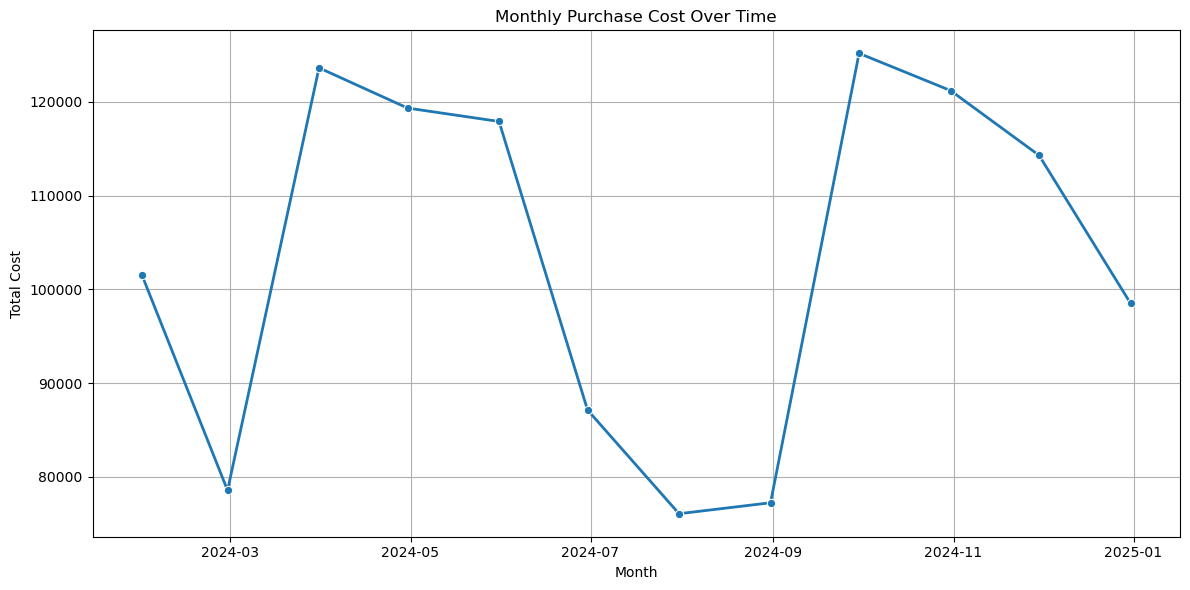

In [20]:
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])
df.set_index('PurchaseDate', inplace=True)

monthly = df.resample('M')['TotalCost'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly.index, y=monthly.values, marker='o', linewidth=2)
plt.title('Monthly Purchase Cost Over Time')
plt.xlabel('Month')
plt.ylabel('Total Cost')
plt.grid(True)
plt.tight_layout()
plt.show()

### Supplier Contribution by Total Purchase Value

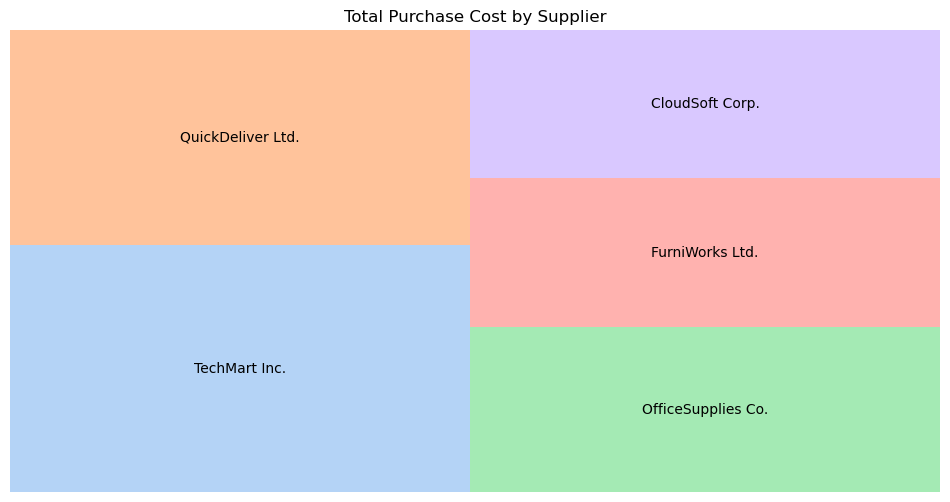

In [21]:
import squarify

supplier_cost = df.groupby('Supplier')['TotalCost'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
squarify.plot(sizes=supplier_cost['TotalCost'], 
              label=supplier_cost['Supplier'], 
              alpha=.8, 
              color=sns.color_palette('pastel'))
plt.title('Total Purchase Cost by Supplier')
plt.axis('off')
plt.show()

### Buyer Share by Purchase Amount

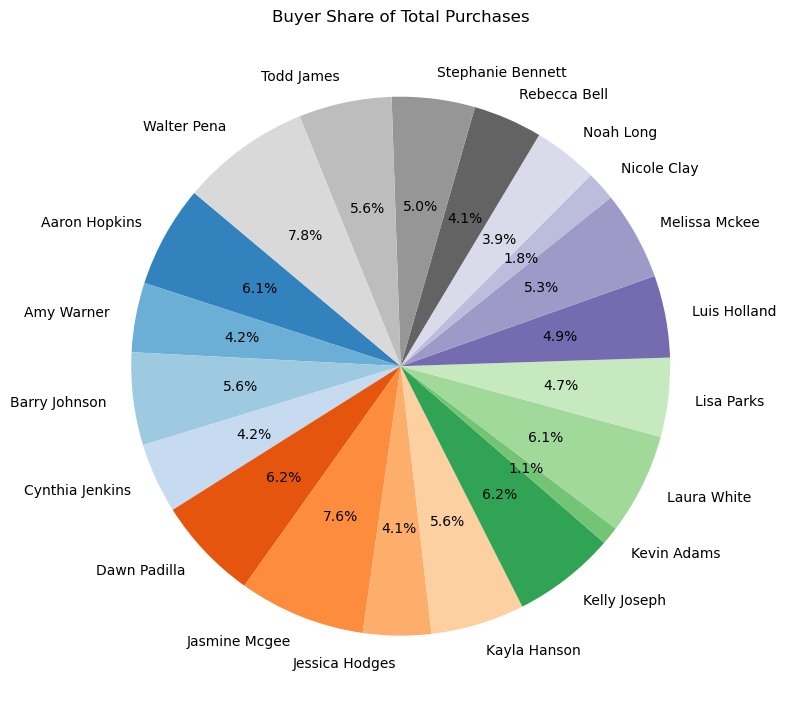

In [22]:
buyer_share = df.groupby('Buyer')['TotalCost'].sum()

plt.figure(figsize=(8, 8))
buyer_share.plot.pie(autopct='%1.1f%%', startangle=140, colormap='tab20c')
plt.ylabel('')
plt.title('Buyer Share of Total Purchases')
plt.tight_layout()
plt.show()